## STEPS

- Import the libraries
- Import the dataset
- Perform the Data Analysis (DM, DE, DC, DV, EDA)
- Feature Scaling
- Encoding
- Feature Selection
- Choosing the model -> Logistic Regression
- Split the Data -> CV
- Training the model
- Test the model
- Performance -> Confusion Matrix

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, r2_score
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix

## Importing the Dataset

In [2]:
link = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(link)

In [3]:
df.tail(3)

# Here survived is the target value and all others are features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Age should be in int

<Axes: >

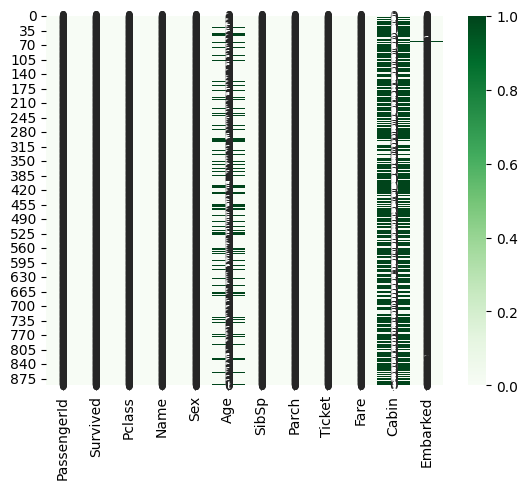

In [8]:
sns.heatmap(df.isnull(), annot = True, cmap = 'Greens' )

# Data Cleaning

In [9]:
# Percentage of null values in Age column
df['Age'].isnull().sum()/len(df.Age) * 100

19.865319865319865

In [10]:
df['Cabin'].isnull().sum()/len(df.Cabin) * 100

77.10437710437711

In [11]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
df[df['Cabin'] == 'C85']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [13]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# Handling Null Values in the "Embarked" Feature

## Approach:
As the null values for the **Embarked** feature are low, they can be filled based on related features in the dataset. The process involves hypothesis testing to identify whether a relationship exists between the **Embarked** feature and other related features.

---

## Hypothesis Testing:

### 1. Null Hypothesis (\( H_0 \)):
There is **no relation** between the **Embarked** feature and related features in the dataset.

### 2. Alternate Hypothesis (\( H_a \)):
There is a **relation** between the **Embarked** feature and related features in the dataset.

---

## Steps:
1. **Analyze Related Features**:
   - Identify potential features that might influence the **Embarked** value, such as:
     - **Pclass** (Passenger Class)
     - **Fare**
     - **Survived**
     - **Sex**
     - **Age**

2. **Conduct Statistical Tests**:
   - Use appropriate tests to check for relationships:
     - **Chi-Square Test**: For categorical features like **Pclass**, **Sex**, and **Survived**.
     - **ANOVA or T-Test**: For numerical features like **Fare** and **Age**.

3. **Fill Null Values Based on Relationships**:
   - If a significant relationship is found (\( p < 0.05 \)), use the related features to impute the missing values.
   - If no significant relationship is found, use alternative methods (e.g., mode imputation).

---


In [15]:
# Show all the Embarked values where Pclass = 1
df[df.Pclass == 3]['Embarked'].value_counts()

# Hence we can say that there is no relation between pclass and embarked

Embarked
S    353
Q     72
C     66
Name: count, dtype: int64

In [16]:
# Lets try other features now
df[df.Cabin == 'B28']['Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

In [17]:
# By trying all the features, we knew that there is no relation with any feature...
# Hence we can deop Cabin (a lot of null values)
df.drop('Cabin', axis = 1, inplace = True)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [18]:
# Remove the rows which has null values in Embarked
df.dropna(subset=['Embarked'], inplace=True)
df.shape

(889, 11)

In [19]:
# Mean
df.Age.mean()
# Outliers effect the mean -> so not used to fill null values

29.64209269662921

In [20]:
# Median
df.Age.median()

28.0

In [21]:
# Mode
df.Age.mode()

0    24.0
Name: Age, dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


<Axes: ylabel='Age'>

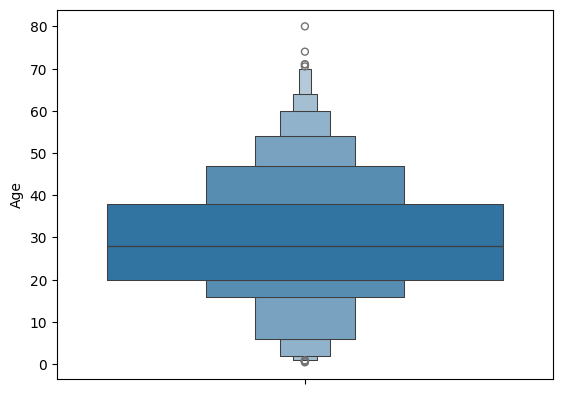

In [23]:
# df.boxplot()  # For the whole df

sns.boxenplot(df['Age'])

In [24]:
df.Age.value_counts()
# The repeated values (mode) count is very small compared to the total data points
# So, mode is not preferable

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [25]:
# Hence median is  a little better to replace
# Fill all the null values in the Age column with its median value
# df.Age.fillna(value = df.Age.median(), inplace = True) -> gives a warning

# Instead of inplace=True, assign the result back to the column
df['Age'] = df['Age'].fillna(value=df['Age'].median())

In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
# Hence, The dataset is cleaned
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- PassengerId, Name, Ticket doesn't help us
- String values can be easily eliminated...
- But we should not prefer to delete the numerical values as they help us to find correlation etc

In [28]:
# Drop off the columns 
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [29]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


### Plot a graph : Strength of Male V/s Strength

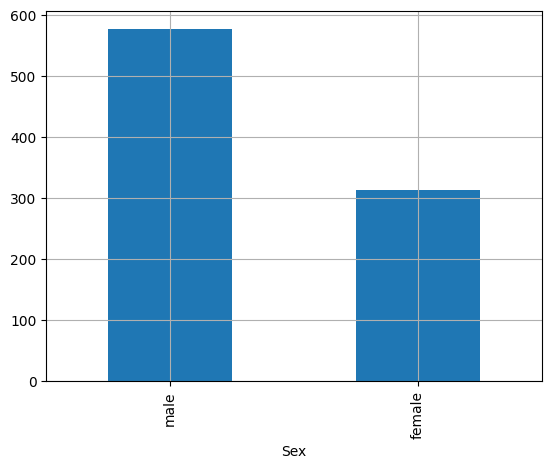

In [30]:
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

### Plot a graph : Strength of Survival V/s Non-Survival

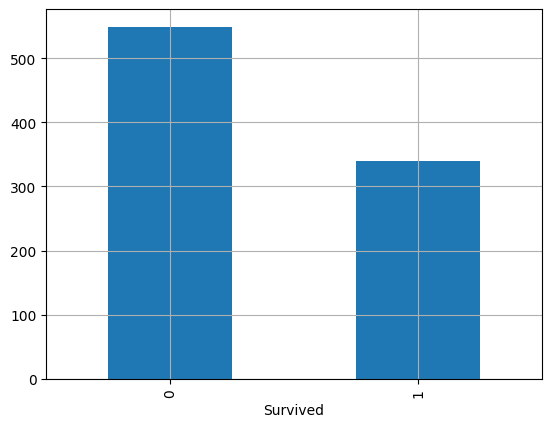

In [31]:
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

### Plot a graph to find out the survival and non-survival rate w.r.t Sex

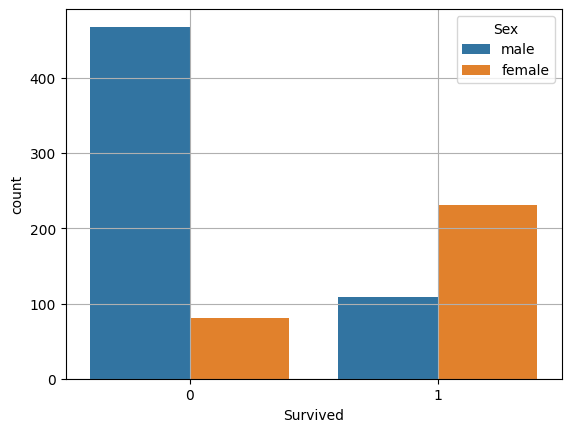

In [32]:
# df.Sex.groupby(df.Survived).value_counts().plot(kind = 'bar')  
#  or

sns.countplot(x = 'Survived', data = df, hue = 'Sex')
plt.grid()
# Most of the male hasn't survived

### Plot a graph to find out the strength of the Pclass

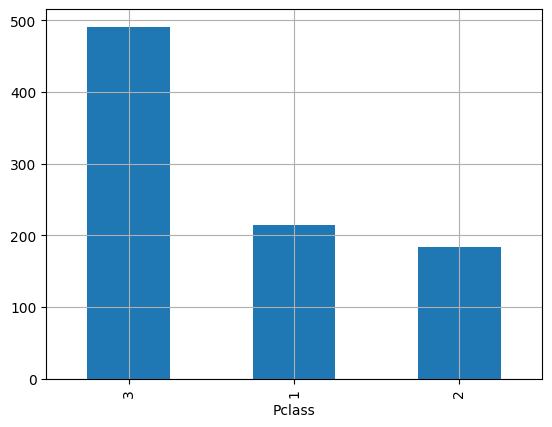

In [33]:
df.Pclass.value_counts().plot.bar(df.Pclass)
plt.grid()

### Plot a graph to find out the survival and non-survival rate w.r.t Pclass

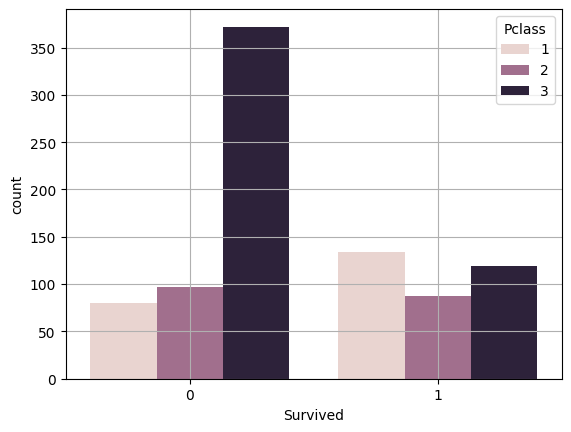

In [34]:
sns.countplot(x = 'Survived', data = df, hue = 'Pclass')
plt.grid()
# Most of the class 3 hasn't survived

In [35]:
# Changing the Age dtype to int
df.Age = df.Age.astype(int)

In [36]:
# Round off the Fare to 2 decimal places
df.Fare = round(df.Fare, 2)

In [37]:
pd.get_dummies(df) 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.25,False,True,False,False,True
1,1,1,38,1,0,71.28,True,False,True,False,False
2,1,3,26,0,0,7.92,True,False,False,False,True
3,1,1,35,1,0,53.10,True,False,False,False,True
4,0,3,35,0,0,8.05,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.00,False,True,False,False,True
887,1,1,19,0,0,30.00,True,False,False,False,True
888,0,3,28,1,2,23.45,True,False,False,False,True
889,1,1,26,0,0,30.00,False,True,True,False,False


- **Encoders** : Converts the data from the categorical form to numerical form without changing its meaning

- As Sex has only 2 values.... we can only keep one column during encoding where
- 0 -> male     1 -> female
- 0 -> female   1 -> male

In [38]:
# Label encoding for Column Sex
from sklearn.preprocessing import LabelEncoder

In [39]:
enc = LabelEncoder()

In [40]:
df.Sex = enc.fit_transform(df.Sex)

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [42]:
# One Hot encoding for the column Embarked
newdf = df.copy()

In [43]:
newdf = pd.get_dummies(newdf['Embarked'])

In [44]:
newdf.head()

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [45]:
# We can actually keep only 2 cols as when both the cols are 0, it means that it belongs to the third column


In [46]:
# Concat this newdf into the actual df 


In [47]:
new = df.copy()

In [48]:
df = pd.concat([new, pd.get_dummies(new['Embarked'])], axis = 1)

In [49]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,False,False,True
1,1,1,0,38,1,0,71.28,C,True,False,False
2,1,3,0,26,0,0,7.92,S,False,False,True
3,1,1,0,35,1,0,53.10,S,False,False,True
4,0,3,1,35,0,0,8.05,S,False,False,True


In [50]:
# Drop a col from the embarked and the embarked col
df.drop(['Embarked', 'C'], axis = 1, inplace = True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    int32  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    bool   
 8   S         889 non-null    bool   
dtypes: bool(2), float64(1), int32(2), int64(4)
memory usage: 50.4 KB


<Axes: >

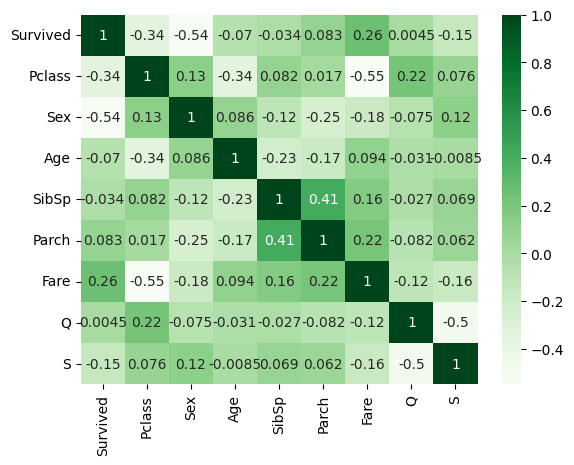

In [52]:
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

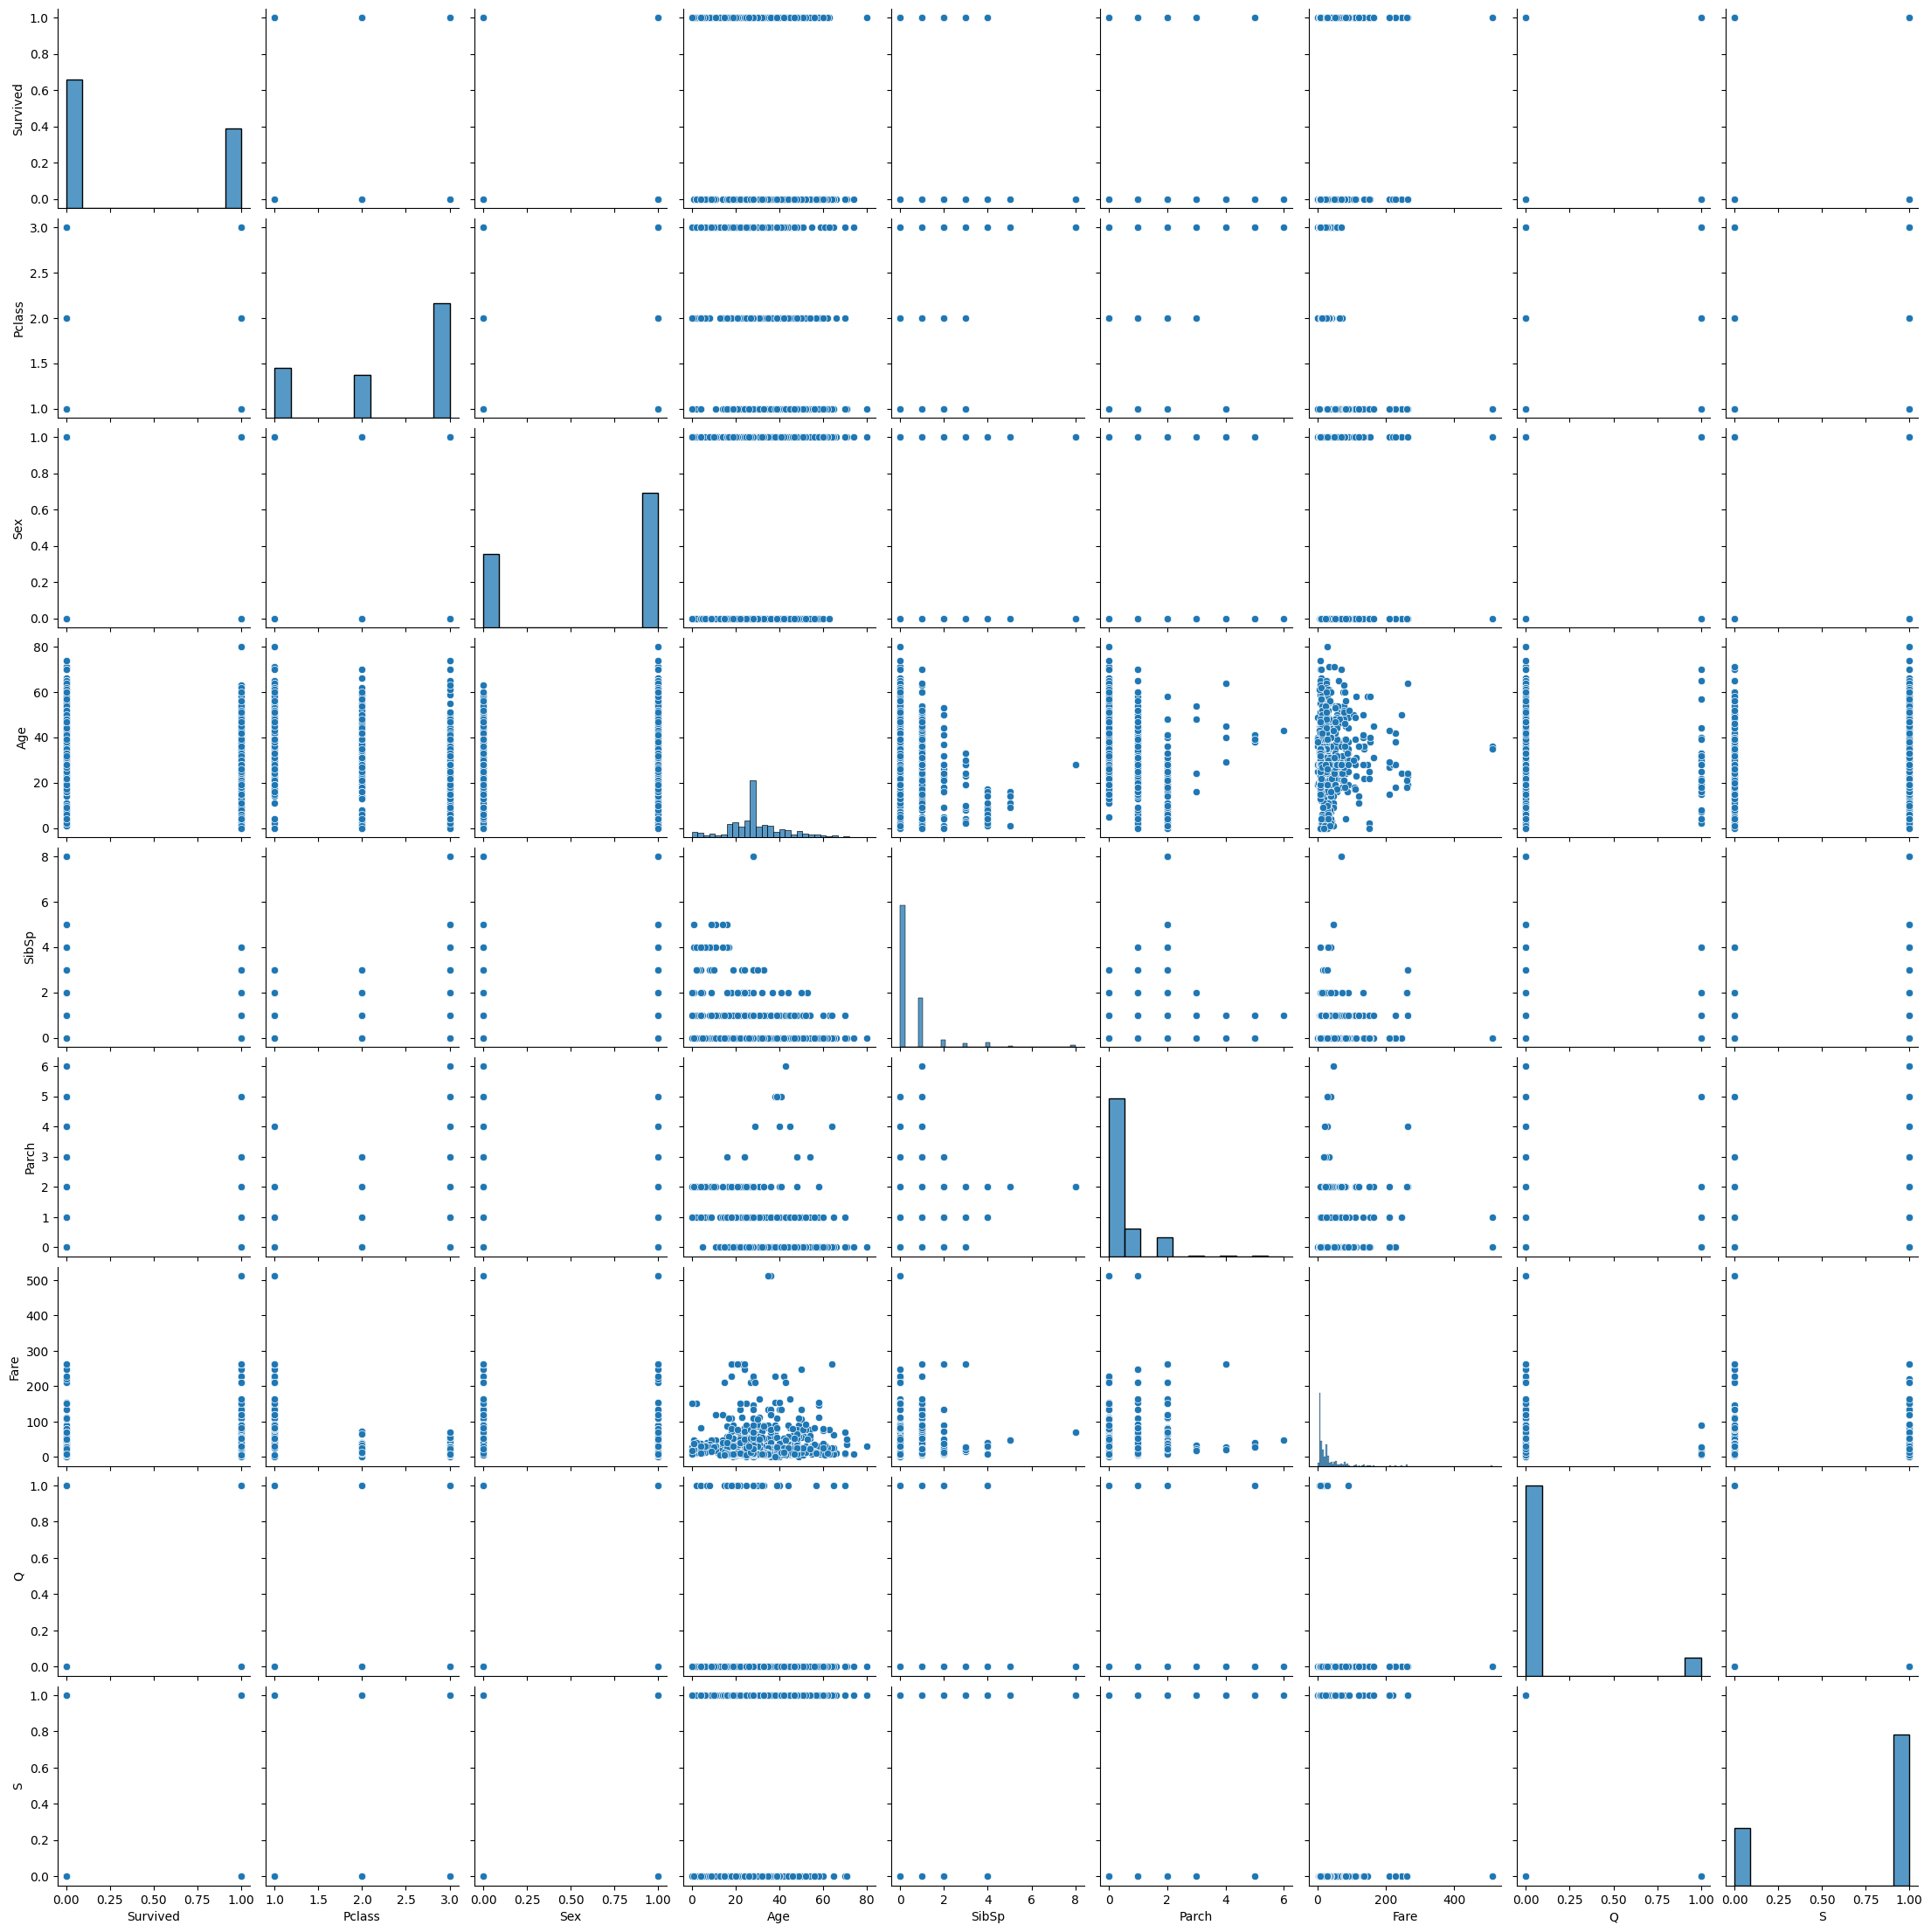

In [53]:
sns.pairplot(df)

In [54]:
# Feature Importance
X = df.iloc[:,1:]
y = df.iloc[:, 0]

In [55]:
X, y

(     Pclass  Sex  Age  SibSp  Parch   Fare      Q      S
 0         3    1   22      1      0   7.25  False   True
 1         1    0   38      1      0  71.28  False  False
 2         3    0   26      0      0   7.92  False   True
 3         1    0   35      1      0  53.10  False   True
 4         3    1   35      0      0   8.05  False   True
 ..      ...  ...  ...    ...    ...    ...    ...    ...
 886       2    1   27      0      0  13.00  False   True
 887       1    0   19      0      0  30.00  False   True
 888       3    0   28      1      2  23.45  False   True
 889       1    1   26      0      0  30.00  False  False
 890       3    1   32      0      0   7.75   True  False
 
 [889 rows x 8 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 889, dtype: int64)

In [56]:
# from sklearn.ensemble import ExtraTreeClassifier   # In the video and worked
from sklearn.tree import ExtraTreeClassifier

In [57]:
feat = ExtraTreeClassifier()

In [58]:
feat.fit(X, y)

ExtraTreeClassifier()

In [59]:
feat.feature_importances_

array([0.11152416, 0.30973603, 0.22579046, 0.06025281, 0.04891854,
       0.22500204, 0.00606729, 0.01270865])

<Axes: >

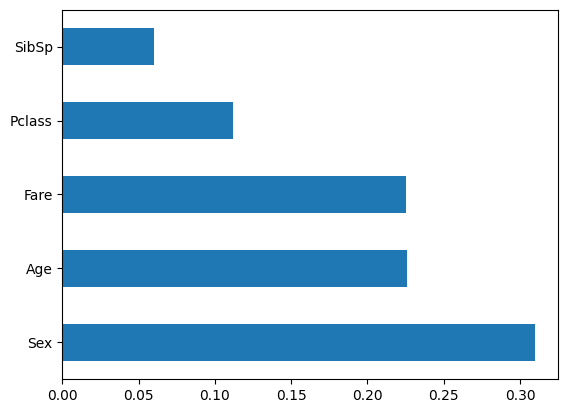

In [60]:
feat_imp = pd.Series(feat.feature_importances_, index = X.columns)
feat_imp.nlargest(5).plot(kind = 'barh')

<Axes: >

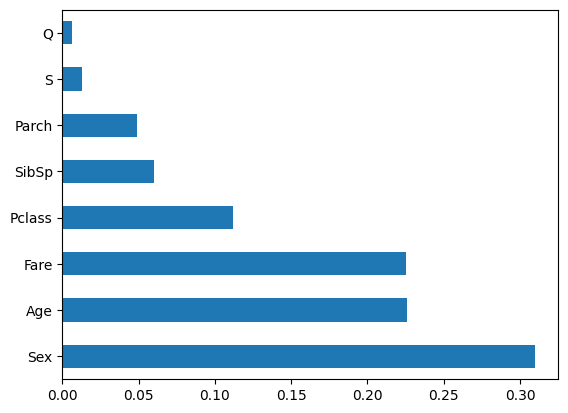

In [61]:
feat_imp.nlargest(8).plot(kind = 'barh')

In [62]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data (Cross Validation)
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Model Selection with increased max_iter
classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [63]:
# Testing the model
y_pred = classifier.predict(X_test)

In [64]:

final = pd.DataFrame({"Actual" : y_test, 'Predicted' : y_pred})

In [65]:
final.head()

,Actual,Predicted
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<Axes: >

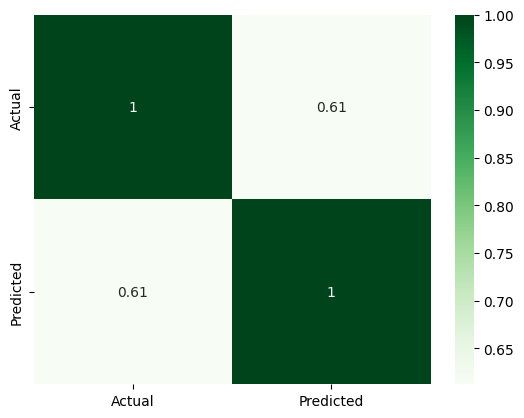

In [66]:
sns.heatmap(final.corr(), annot = True, cmap = 'Greens')

## Performance Metrics

In [67]:
# -> COnfusion Matrix
confusion_matrix(y_test, y_pred)

array([[97, 12],
       [20, 48]], dtype=int64)

In [68]:
# accuracy = (98+48)/Total
146/177

0.8248587570621468

In [69]:
accuracy_score(y_test, y_pred)

0.8192090395480226

In [70]:
from sklearn.metrics import classification_report

In [71]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86       109\n           1       0.80      0.71      0.75        68\n\n    accuracy                           0.82       177\n   macro avg       0.81      0.80      0.80       177\nweighted avg       0.82      0.82      0.82       177\n'

# Exportation of Model (Dumping) and Dataset

## Pickle Library

- **Pickle** library is used for dumping (serializing) and loading (deserializing) models and datasets.
  
- **Serialisation** (Pickling) is the process of converting an object into a byte stream.
  
- **Deserialisation** (Unpickling) is the process of converting the byte stream back into an object.

## Terms:
- **Dumping**: Storing a Python object into a file.
- **Undumping**: Loading the Python object back from the file.
- **Pickling**: The process of serializing an object.
- **Unpickling**: The process of deserializing an object.

## Example:
- To dump a model or dataset using pickle:

In [72]:
from sklearn.linear_model import LogisticRegression
import pickle

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)  # Assuming X_train and y_train are defined

# Serializing the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Deserializing the model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now you can use `loaded_model` to make predictions